###OLD CODE WHICH WAS TOO SLOW

In [1]:
# client_id = 'tp727tqv2zbm7mwh8e51dkz69suiz7'
# client_secret = 'ks121dzfdfmnp9bfa5zyujg7g0yije'
# url = 'https://id.twitch.tv/oauth2/token'

# data = {
#     'client_id': client_id,
#     'client_secret': client_secret,
#     'grant_type': 'client_credentials'
# }

# response = requests.post(url, data=data)

# # Check if the request was successful
# if response.status_code == 200:
#     token_info = response.json()
#     access_token = token_info['access_token']
#     print("Access Token:", access_token)
# else:
#     print(f"Failed to get token: {response.status_code}")
#     print(response.text)

In [2]:
#ORIGINAL CODE WHICH WAS TOO SLOW TO RUN#

# How many games each call will fetch
# LIMIT = 400


# wrapper = IGDBWrapper("tp727tqv2zbm7mwh8e51dkz69suiz7", "ns8jc9nu4ihapg0ly980q70dn2wwhh")

# #This gets the games with some attributes from the API. The API allows for 4 calls/second so the .sleep() is to not overload the API.
# def get_games(last, wrap):
#     options = f'fields id, name, rating,rating_count, aggregated_rating, aggregated_rating_count; sort rating desc; where aggregated_rating_count > 0;limit {LIMIT}; offset{last};'
#     print('last was {0}'.format(last))
#     time.sleep(1)
#     return wrap.api_request('games', options)

# def get_release_dates(game_id,wrap):
#     options = f'fields game, y; where game = {game_id};'
#     return wrap.api_request('release_dates', options)

# #Makes a list of the games with their info and writes it to a CSV file
# def make_list(end: int = 10000):
#     last = 0

#     with open('game_titles.csv', 'w', newline='', encoding='utf-8') as myfile:
#         column_headers=['ID','Name', 'Release Year', 'User Rating', 'Num of Ratings', 'Critic Rating', 'Num of Critic Ratings'] #Defining columns of dataframe
#         wr = csv.DictWriter(myfile, fieldnames=column_headers)
#         wr.writeheader()

#         for last in range(0, end, LIMIT):

#           game_data = json.loads(get_games(last, wrapper).decode('utf-8').replace("'", '"')) #Getting game info
#           for item in game_data:
#             game_id = item.get('id')
#             release_dates_data = json.loads(get_release_dates(game_id, wrapper).decode('utf-8').replace("'", '"')) #Extracting the release year based on gameID

#             release_year = 'NA'
#             if release_dates_data:
#               release_year = release_dates_data[0].get('y')

#             wr.writerow({
#                 'ID': item.get('id', 'N/A'),
#                 'Name':item.get('name', 'N/A'),
#                 'Release Year':release_year,
#                 'User Rating':item.get('rating', 'N/A'),
#                 'Num of Ratings':item.get('rating_count', 'N/A'),
#                 'Critic Rating':item.get('aggregated_rating', 'N/A'),
#                 'Num of Critic Ratings':item.get('aggregated_rating_count', 'N/A')})

#     print("Games saved to 'game_titles.csv'")

# make_list(10000)




#Introduction

Welcome to my video game analysis project!

Video games have gone from being niche, almost fringe activities to reaching the pinnacle of pop-culture in modern times. As such, this is an area with a lot of interest and video games have impacted all of our lives in one way or another

I want to see the story behind the video game industry over the last __ years. I've found, scraped and imported data which I think will be sufficient for this analysis but before we dive in, a few words on how I'd like to approach this.

My approach will be to look first at each of my three sources of data, namely ratings, game info and streaming. First I will look on an overall level, ie without loking at trends, to see which features from the data have performed the best. For example, we will look at which publishers have sold the most ganes. After that we can dive in to see what the trends have been over time, like how the sales of the top publishers have looked over time.

So, to start we could look at the game publishers. Who have been the biggest publishers (both by number of games published and by game sales). Which game has been the best seller for these publishers and which genre?  

Next up I think it would be interesting to see which platforms/consols have been the most successful since not all games are published on all consols. We can tie the popularity of the consols back to the success of the game publishers.

After that, we can focus on the games themselves.
We can look at what has been the best selling games, regardless of publisher, and which regions these games performed best in. Which genres have been the best performers, again both by number of games published as well by number sold.

That'll be the general level overview. Next up we can dive into the trends.
I think itll be interesting to take the top 5 publishers and the top 5 genres and see how their popularity have evolved over time. Lastly we can look at the best selling game each year.

Onto the second data source, ratings, we will look at the patterns of metacritic ratings vs user ratings.

Lastly, we will move onto streaming data. Here we can look at the most popular games streamed each year.

Once we have finished with that, I think it will be interesting to tie the data together and look at correlations between the variables. Was the highest rated game in 2020 streamed the most or the most sold?

I'll test any of my findings using statistical models to test the significance of any of these correlations.

Before we begin with any analysis, we need to import and clean our data.

###Importing libraries and data sources

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import csv
import time
import json


###Importing datasets

I found multiple datasets and the info I wanted was spread amongst them. I imorted them all into my notebook and merged the ones that had overlapping info.

In [4]:
!kaggle datasets download -d patkle/video-game-sales-data-from-vgchartzcom

Dataset URL: https://www.kaggle.com/datasets/patkle/video-game-sales-data-from-vgchartzcom
License(s): other
  0% 0.00/1.60M [00:00<?, ?B/s]
100% 1.60M/1.60M [00:00<00:00, 132MB/s]


In [5]:
!unzip video-game-sales-data-from-vgchartzcom.zip

Archive:  video-game-sales-data-from-vgchartzcom.zip
  inflating: game_statistics_feb_2023.csv  


In [6]:
game_sales = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/vgsales.csv.zip')
game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
game_stats = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/game_statistics_feb_2023.csv')

<ipython-input-7-f96a18efc903>:1: DtypeWarning: Columns (1,2,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  game_stats = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/game_statistics_feb_2023.csv')


In [8]:
game_stats = pd.merge(game_stats, game_sales, left_on='title', right_on ='Name',how='left')
game_stats.head()

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,...,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Professor Layton,NaN,18.00m,Nintendo,Level-5,10th Feb 08,Series,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
2,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
3,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
4,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29


In [9]:
df_2023 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (1).csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (2).csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (3).csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (4).csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (5).csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (6).csv')
df_2016 = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/Most watched games on Twitch - SullyGnome (7).csv')

df_2023['Year'] = 2023
df_2022['Year'] = 2022
df_2021['Year'] = 2021
df_2020['Year'] = 2020
df_2019['Year'] = 2019
df_2018['Year'] = 2018
df_2017['Year'] = 2017
df_2016['Year'] = 2016

In [10]:
stream_data = pd.concat([df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016])

In [11]:
!kaggle datasets download -d henrylin03/metacritic-games-user-reviews-and-metascores

Dataset URL: https://www.kaggle.com/datasets/henrylin03/metacritic-games-user-reviews-and-metascores
License(s): copyright-authors
100% 20.1M/20.1M [00:00<00:00, 104MB/s] 
100% 20.1M/20.1M [00:00<00:00, 95.4MB/s]


In [12]:
!unzip metacritic-games-user-reviews-and-metascores.zip

Archive:  metacritic-games-user-reviews-and-metascores.zip
  inflating: games.csv               


In [13]:
meta_reviews = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/games.csv')
meta_reviews.head()

,name,platform,release_date,summary,metascore,userscore
0,! SPACE ACCIDENT !,PC,"February 10, 2022",The year is 2119. A turning point has begun in...,tbd,tbd
1,! That Bastard Is Trying To Steal Our Gold !,PC,"May 11, 2014",It's a fun puzzle game where you need to steal...,tbd,3.4
2,!4RC4N01D!,PC,"January 12, 2018",Hardcore arkanoid in the spirit of old games f...,tbd,4.0
3,!4RC4N01D! 2: Retro Edition,PC,"February 6, 2018","Everyone dreams of returning 2007, but no one ...",tbd,3.8
4,!4RC4N01D! 3: Cold Space,PC,"March 8, 2018",!4RC4N01D! returns! This time we have an accid...,tbd,3.0


In [14]:
game_rank = pd.read_csv('/content/drive/MyDrive/DI Bootcamp final project data/game_titles.csv', delimiter=',')
game_rank.head()

,ID,Name,Release Year,User Rating,Num of Ratings,Critic Rating,Num of Critic Ratings
0,173172,Outer Wilds: Archaeologist Edition,1970.0,99.655340,9,85.0,2
1,20196,Metal Gear Solid: The Legacy Collection,1970.0,99.546988,38,87.0,3
2,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4
3,4095,Scaler,1970.0,99.415612,10,60.0,2
4,212264,Fuga: Melodies of Steel 2,1970.0,99.351282,6,85.0,2


In [15]:
game_rank = pd.merge(game_rank, meta_reviews, left_on='Name', right_on ='name',how='left')
game_rank.head()

,ID,Name,Release Year,User Rating,Num of Ratings,Critic Rating,Num of Critic Ratings,name,platform,release_date,summary,metascore,userscore
0,173172,Outer Wilds: Archaeologist Edition,1970.0,99.655340,9,85.0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,20196,Metal Gear Solid: The Legacy Collection,1970.0,99.546988,38,87.0,3,Metal Gear Solid: The Legacy Collection,PlayStation 3,"July 9, 2013",Celebrating the 25th anniversary of the METAL ...,93,9.0
2,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,PlayStation 2,"July 29, 2008",With over ten different exciting game modes in...,67,8.5
3,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,DS,"August 25, 2008",With over ten different exciting game modes in...,70,tbd
4,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,Wii,"July 29, 2008",With over ten different exciting game modes in...,79,8.9


In [16]:
game_stats.head()

,title,total_sales,total_shipped,publisher,developer,release_date,platform,japan_sales,na_sales,other_sales,...,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Professor Layton,NaN,18.00m,Nintendo,Level-5,10th Feb 08,Series,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
2,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
3,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
4,Need for Speed: Most Wanted,NaN,17.80m,Electronic Arts,EA Canada,15th Nov 05,All,NaN,NaN,NaN,...,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29


In [17]:
stream_data.head()

,Unnamed: 0,Unnamed: 1,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Unnamed: 11,Year
0,1,NaN,Just Chatting,186057846660,2176264920,1183419,8310,2319716,354031,4141,85.49,NaN,2023
1,2,NaN,Grand Theft Auto V,80078621460,1470086040,528554,5377,1480243,152373,2797,54.47,NaN,2023
2,3,NaN,League of Legends,79363308780,1537277100,2597522,6356,938141,151012,2925,51.63,NaN,2023
3,4,NaN,VALORANT,59292102840,2398618140,1196352,9350,1587006,112821,4564,24.72,NaN,2023
4,5,NaN,Counter-Strike,41175237300,697160220,1117445,4016,864073,78348,1326,59.06,NaN,2023


In [18]:
game_rank.head()

,ID,Name,Release Year,User Rating,Num of Ratings,Critic Rating,Num of Critic Ratings,name,platform,release_date,summary,metascore,userscore
0,173172,Outer Wilds: Archaeologist Edition,1970.0,99.655340,9,85.0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,20196,Metal Gear Solid: The Legacy Collection,1970.0,99.546988,38,87.0,3,Metal Gear Solid: The Legacy Collection,PlayStation 3,"July 9, 2013",Celebrating the 25th anniversary of the METAL ...,93,9.0
2,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,PlayStation 2,"July 29, 2008",With over ten different exciting game modes in...,67,8.5
3,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,DS,"August 25, 2008",With over ten different exciting game modes in...,70,tbd
4,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,Wii,"July 29, 2008",With over ten different exciting game modes in...,79,8.9


#Preprocessing the data

In [19]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84955 entries, 0 to 84954
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           84955 non-null  object 
 1   total_sales     36066 non-null  object 
 2   total_shipped   6044 non-null   object 
 3   publisher       84955 non-null  object 
 4   developer       84938 non-null  object 
 5   release_date    79057 non-null  object 
 6   platform        84955 non-null  object 
 7   japan_sales     10173 non-null  object 
 8   na_sales        27887 non-null  object 
 9   other_sales     31771 non-null  object 
 10  pal_sales       28294 non-null  object 
 11  pos             84955 non-null  int64  
 12  user_score      583 non-null    float64
 13  vgchartz_score  3329 non-null   float64
 14  critic_score    13160 non-null  float64
 15  last_update     22028 non-null  object 
 16  Rank            44143 non-null  float64
 17  Name            44143 non-null 

Release date is the only column that needs converting

In [20]:
game_stats['release_date'] = pd.to_datetime(game_stats['release_date'])

<ipython-input-20-9afd52610231>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game_stats['release_date'] = pd.to_datetime(game_stats['release_date'])


In [21]:
print (f'Number of rows: {len(game_stats)}')

game_stats.isna().sum()

Number of rows: 84955


,0
title,0
total_sales,48889
total_shipped,78911
publisher,0
developer,17
release_date,5898
platform,0
japan_sales,74782
na_sales,57068
other_sales,53184


After joining the dataframes there were many duplicate columns as well as empty columns from the intial dataframe.

I dropped total sales, japan_sales, na_sales, other_sales, pal_sales, user_score, vgchartz_score, critic_score,last_update due to too much missing data. I dropped the duplicate columns.

I dropped only the missing rows in developer and release date

In [22]:
game_stats.dropna(subset=['release_date'], inplace=True)
game_stats = game_stats.drop(['total_sales', 'total_shipped','developer','pos','japan_sales', 'na_sales', 'other_sales', 'pal_sales', 'user_score', 'vgchartz_score', 'critic_score', 'last_update','Name','Publisher'], axis=1)
game_stats.drop(['Year'],axis=1,inplace=True)
game_stats.drop(['platform'], axis=1, inplace=True)

Lastly I wanted to check for durplicates

In [23]:
duplicate_rows = game_stats[game_stats.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# If there are duplicates, you can drop them
if len(duplicate_rows) > 0:
  game_stats.drop_duplicates(inplace=True)
  print("Duplicate rows dropped.")

Number of duplicate rows: 19854
Duplicate rows dropped.


In [24]:
game_rank.head()

,ID,Name,Release Year,User Rating,Num of Ratings,Critic Rating,Num of Critic Ratings,name,platform,release_date,summary,metascore,userscore
0,173172,Outer Wilds: Archaeologist Edition,1970.0,99.655340,9,85.0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,20196,Metal Gear Solid: The Legacy Collection,1970.0,99.546988,38,87.0,3,Metal Gear Solid: The Legacy Collection,PlayStation 3,"July 9, 2013",Celebrating the 25th anniversary of the METAL ...,93,9.0
2,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,PlayStation 2,"July 29, 2008",With over ten different exciting game modes in...,67,8.5
3,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,DS,"August 25, 2008",With over ten different exciting game modes in...,70,tbd
4,5010,MLB Power Pros 2008,1970.0,99.530611,10,71.0,4,MLB Power Pros 2008,Wii,"July 29, 2008",With over ten different exciting game modes in...,79,8.9


In [25]:
game_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22627 entries, 0 to 22626
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22627 non-null  int64  
 1   Name                   22627 non-null  object 
 2   Release Year           22622 non-null  float64
 3   User Rating            22627 non-null  float64
 4   Num of Ratings         22627 non-null  int64  
 5   Critic Rating          22627 non-null  float64
 6   Num of Critic Ratings  22627 non-null  int64  
 7   name                   20840 non-null  object 
 8   platform               20840 non-null  object 
 9   release_date           20840 non-null  object 
 10  summary                20561 non-null  object 
 11  metascore              20840 non-null  object 
 12  userscore              20840 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.2+ MB


In [26]:
# Convert 'Num of Ratings' and 'Num of Critic Ratings' to float
game_rank['Num of Ratings'] = pd.to_numeric(game_rank['Num of Ratings'], errors='coerce')
game_rank['Num of Critic Ratings'] = pd.to_numeric(game_rank['Num of Critic Ratings'], errors='coerce')
game_rank['release_date'] = pd.to_datetime(game_rank['release_date'])
game_rank['metascore'] = pd.to_numeric(game_rank['metascore'], errors='coerce')
game_rank['userscore']= pd.to_numeric(game_rank['userscore'], errors='coerce')*10

In [27]:
print(len(game_rank))
game_rank.isna().sum()

22627


,0
ID,0
Name,0
Release Year,5
User Rating,0
Num of Ratings,0
Critic Rating,0
Num of Critic Ratings,0
name,1787
platform,1787
release_date,1787


Since most of the missing values were the same across the columns, I just needed to drop the NA values from one column and the other columns would get caught in the catchnet.

'name' was duplicated from merging the dataframes.

In [28]:
#These are duplicate rows so they were not needed
game_rank.drop(columns=['name'], inplace=True)
game_rank.dropna(subset=['platform'], inplace=True)
game_rank.drop(columns=['Release Year'], inplace=True)

#Since there were many missing ratings in metascore and userscore, I decided not to drop them and impute them using the mean instead.
game_rank['metascore'].fillna(game_rank['metascore'].mean(), inplace=True)
game_rank['userscore'].fillna(game_rank['userscore'].mean(), inplace=True)

In [29]:
stream_data.isna().sum()

,0
Unnamed: 0,0
Unnamed: 1,400
Game,0
Watch time (mins),0
Stream time (mins),0
Peak viewers,0
Peak channels,0
Streamers,0
Average viewers,0
Average channels,0


In [30]:
stream_data.drop(columns=['Unnamed: 0','Unnamed: 1', 'Unnamed: 11'], inplace=True)

In [31]:
stream_data.head()

,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Year
0,Just Chatting,186057846660,2176264920,1183419,8310,2319716,354031,4141,85.49,2023
1,Grand Theft Auto V,80078621460,1470086040,528554,5377,1480243,152373,2797,54.47,2023
2,League of Legends,79363308780,1537277100,2597522,6356,938141,151012,2925,51.63,2023
3,VALORANT,59292102840,2398618140,1196352,9350,1587006,112821,4564,24.72,2023
4,Counter-Strike,41175237300,697160220,1117445,4016,864073,78348,1326,59.06,2023


In [32]:
stream_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Game                  400 non-null    object 
 1   Watch time (mins)     400 non-null    int64  
 2   Stream time (mins)    400 non-null    int64  
 3   Peak viewers          400 non-null    int64  
 4   Peak channels         400 non-null    int64  
 5   Streamers             400 non-null    int64  
 6   Average viewers       400 non-null    int64  
 7   Average channels      400 non-null    int64  
 8   Average viewer ratio  400 non-null    float64
 9   Year                  400 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 34.4+ KB


In [33]:
stream_data['Year'] = pd.to_datetime(stream_data['Year'], format='%Y')
stream_data['Average viewer ratio'] = pd.to_numeric(stream_data['Average viewer ratio'], errors='coerce')

In [34]:
stream_data['Watch time (mins)']= stream_data['Watch time (mins)']/60
stream_data.rename(columns={'Watch time (mins)':'Watch time (hrs)'}, inplace=True)
stream_data['Stream time (mins)']= stream_data['Stream time (mins)']/60
stream_data.rename(columns={'Stream time (mins)':'Stream time (hrs)'}, inplace=True)

#Initial EDA

I will look at each dataframe individually to see if there are any patterns or noteworthy insights


##Game rank

In [35]:
game_rank.head()

,ID,Name,User Rating,Num of Ratings,Critic Rating,Num of Critic Ratings,platform,release_date,summary,metascore,userscore
1,20196,Metal Gear Solid: The Legacy Collection,99.546988,38,87.0,3,PlayStation 3,2013-07-09,Celebrating the 25th anniversary of the METAL ...,93.0,90.000000
2,5010,MLB Power Pros 2008,99.530611,10,71.0,4,PlayStation 2,2008-07-29,With over ten different exciting game modes in...,67.0,85.000000
3,5010,MLB Power Pros 2008,99.530611,10,71.0,4,DS,2008-08-25,With over ten different exciting game modes in...,70.0,69.418163
4,5010,MLB Power Pros 2008,99.530611,10,71.0,4,Wii,2008-07-29,With over ten different exciting game modes in...,79.0,89.000000
5,4095,Scaler,99.415612,10,60.0,2,PlayStation 2,2004-10-21,"Bobby ""Scaler"" Johnson got more than he bargai...",70.0,86.000000


In [36]:
game_rank.describe()

,ID,User Rating,Num of Ratings,Critic Rating,Num of Critic Ratings,release_date,metascore,userscore
count,20840.000000,20840.000000,20840.000000,20840.000000,20840.000000,20840,20840.000000,20840.000000
mean,38030.106382,71.518200,83.599232,71.756108,5.581238,2014-10-04 01:05:30.287907840,72.741483,69.418163
min,1.000000,40.000000,0.000000,0.000000,1.000000,1992-05-05 00:00:00,16.000000,0.000000
25%,5260.250000,66.239743,6.000000,65.000000,2.000000,2010-09-28 00:00:00,70.000000,66.000000
50%,16880.000000,71.756098,16.000000,74.555556,4.000000,2016-03-01 00:00:00,72.741483,69.418163
75%,47990.000000,79.478863,56.000000,80.750000,8.000000,2019-04-24 06:00:00,78.000000,78.000000
max,266690.000000,99.546988,4573.000000,100.000000,60.000000,2023-03-09 00:00:00,98.000000,100.000000
std,48898.740449,10.389633,245.789300,14.154938,5.218819,NaN,9.589443,12.744006


The average ratings don't differ too much between user rating, critic rating and metascore and userscore which is unexpected since there are not a lot of reviews, especially in critic rating.

I want to look at a visualisation of the review scores and number of reviews(where relevant) since it's interesting to me to see the distribution from the two separate sources.

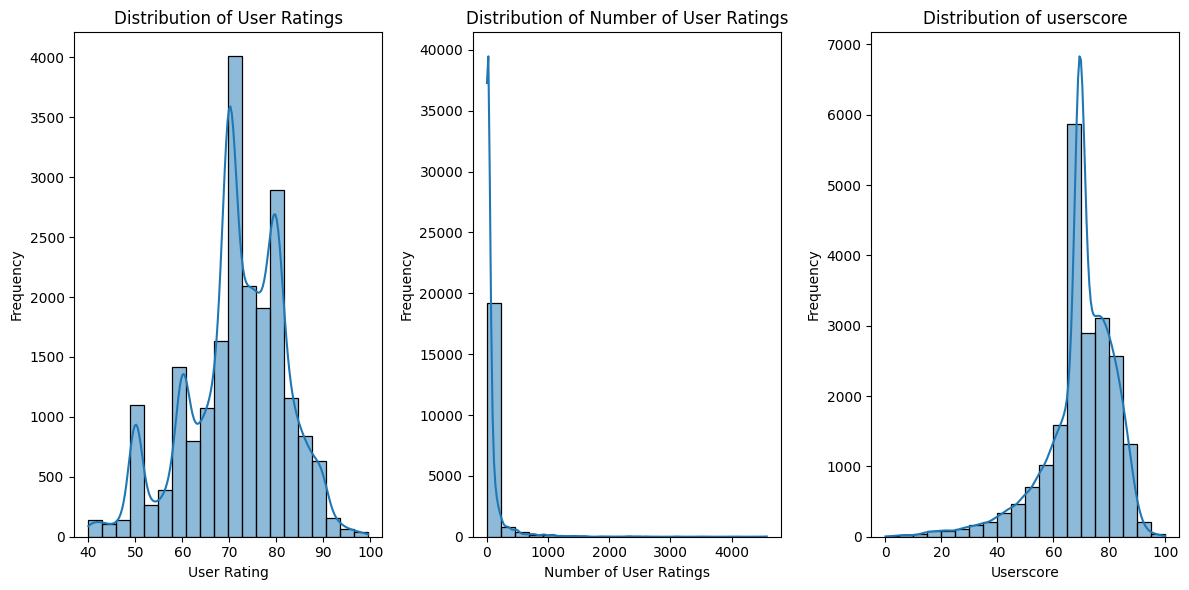

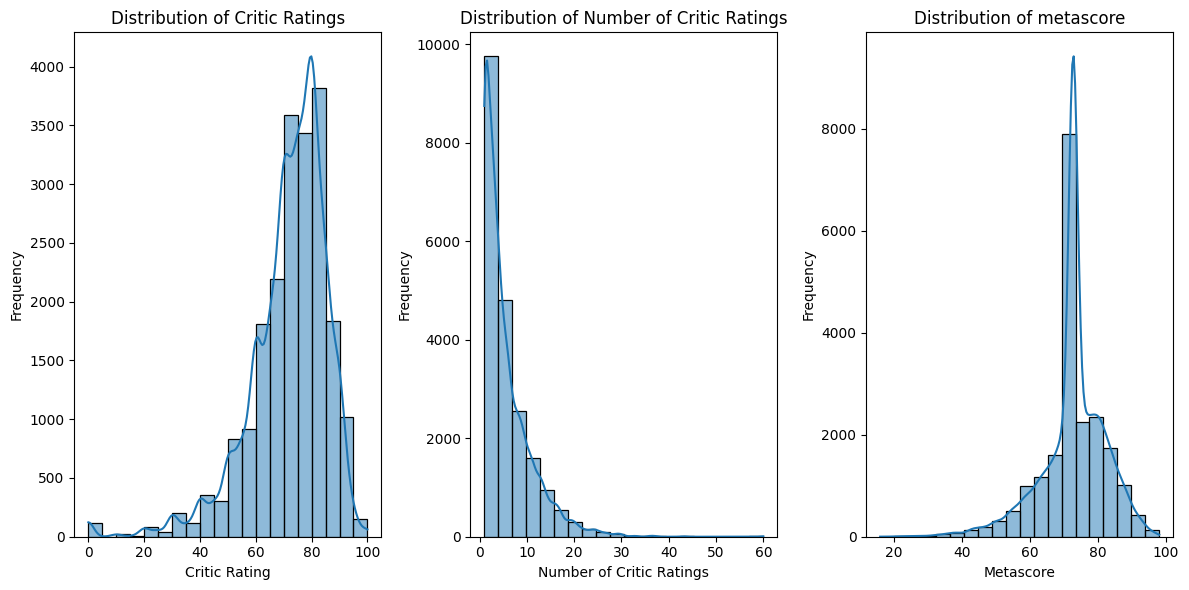

In [37]:
# User Rating and Number of User Ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(game_rank['User Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(game_rank['Num of Ratings'], bins=20, kde=True)
plt.title('Distribution of Number of User Ratings')
plt.xlabel('Number of User Ratings')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.histplot(game_rank['userscore'],bins=20, kde=True)
plt.title('Distribution of userscore')
plt.xlabel('Userscore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Critic Rating and Number of Critic Ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(game_rank['Critic Rating'], bins=20, kde=True)
plt.title('Distribution of Critic Ratings')
plt.xlabel('Critic Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(game_rank['Num of Critic Ratings'], bins=20, kde=True)
plt.title('Distribution of Number of Critic Ratings')
plt.xlabel('Number of Critic Ratings')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.histplot(game_rank['metascore'],bins=20, kde=True)
plt.title('Distribution of metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The lower number of user ratings is evident in the distributin of the graph as the distribution is not normal. The KDE indicates a bimodal distribution with peaks at 70 and 80. There are peaks around 50 and 60 and troughs on the half-ratings (ie 5.5, 6.5).

The critic ratings more closely resembles the distribution of the metascore ratings which is interesting since the average number of critic ratings is only 6 while the metascore is an aggregate from multiple sources with multiple ratings.


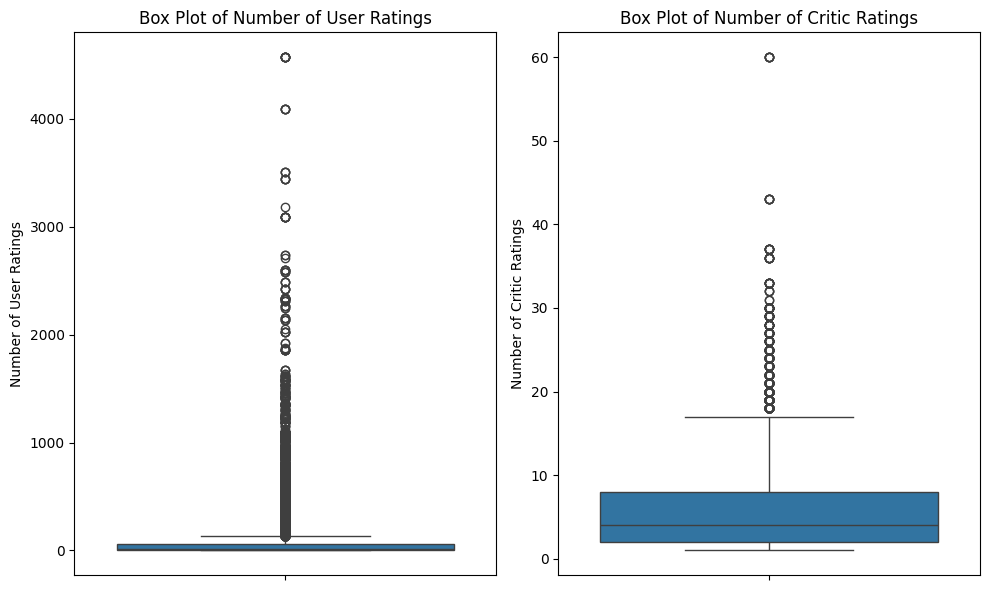

In [38]:
# prompt: make a box plot for num of user ratings and num of critic ratings in vertical orientation

import matplotlib.pyplot as plt
# Box plots for Num of User Ratings and Num of Critic Ratings
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=game_rank['Num of Ratings'])
plt.title('Box Plot of Number of User Ratings')
plt.ylabel('Number of User Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=game_rank['Num of Critic Ratings'])
plt.title('Box Plot of Number of Critic Ratings')
plt.ylabel('Number of Critic Ratings')

plt.tight_layout()
plt.show()


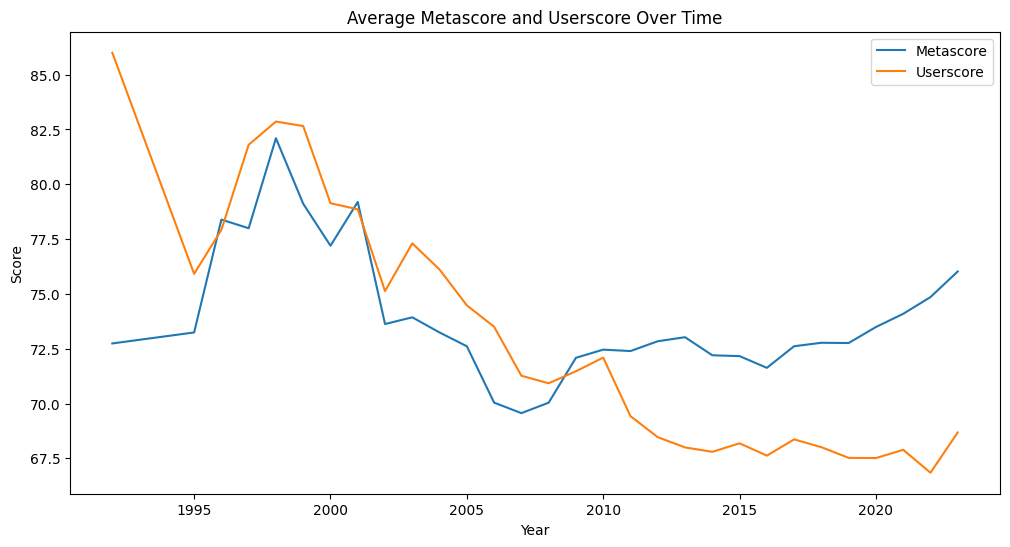

In [39]:
# prompt: line graph of metascore ratings and userscore over the years with

import matplotlib.pyplot as plt
# Convert 'release_date' to year for grouping
game_rank['year'] = game_rank['release_date'].dt.year

# Group by year and calculate the average metascore and userscore
avg_scores_by_year = game_rank.groupby('year')[['metascore', 'userscore']].mean().reset_index()

# Create the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='metascore', data=avg_scores_by_year, label='Metascore')
sns.lineplot(x='year', y='userscore', data=avg_scores_by_year, label='Userscore')
plt.title('Average Metascore and Userscore Over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.show()


Interesting trend. My theory is initialy, video games were new and novel and almost any new game was impressive. As video game prevelance rose, players became more critical and developers started pushing out more and more games of varying quality.

The divergance between user scores and metascore can be due to many reasons but some potentials include:
- A Difference in priority between critics and users. Critics cmay have began appreciating advancements in technology or novel features added to gameplay while users prioritized multiplayer experience and bug fixes. Certain new features also alienate old players and can lead to negative reviews.
- Franchise fatigue.
As certain genres and franchises became oversaturated, users became dissatisfied by new releases while critics still appreciated franchise releases for being a well-made game, albeit in a crowded space.
- Review bombing. Around 2010 rit became popular to downvote a franchise due to unrelated aspects, like a companies dealing with sexual harrasment.
- Change in calculation. It seems like that there could have been a change to how the metascore was calculated vs user score.


##Game stats

In [40]:
game_stats.head()

,title,publisher,release_date,Rank,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Professor Layton,Nintendo,2008-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,253.0,PS2,Racing,2.03,1.79,0.08,0.47,4.37
2,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,499.0,PS3,Racing,0.71,1.51,0.06,0.61,2.89
3,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,1175.0,X360,Racing,0.62,0.80,0.01,0.15,1.58
4,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,1532.0,X360,Racing,1.00,0.17,0.02,0.10,1.29


I want to see the story behind the video game industry over the last 20 years.My approach will be to look first on an overall level, ie without loking at trends. After that we can dive in to see what the trends have been over time.

So, to start we could look at the game publishers. Who have been the biggest publishers (both by number of games published and by game sales). Which game has been the best seller for these publishers and what genre?  

Next up I think it would be interesting to see which platforms/consols have been the most successful since not all games are on all consols. We can tie the popularity of the consols back to the success of the game publishers.

After that, we can focus on the games themselves.
We can look at what has been the best selling games, regardless of publisher, and which regions these games performed best in. Which genres have been the best performers, again both by number of games published as well by number sold.

That'll be the general level overview. Next up we can dive into the trends.
I think itll be interesting to take the top 5 publishers, the top 5 games and the top 5 genres and see how their popularity have evolved over time.

Visualisations:
1. Publishers with most games
2. Publishers with most sales
3. Publishers best selling games
7. Most popular game by sales
8. Game sales by region
3. Platforms with most games
4. Most popular genres
5. General sales trends over time
6. Sales trends by:
- Publisher
- Platform
- Genre


In [41]:
game_stats.describe()

,release_date,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,59203,28241.000000,28241.000000,28241.000000,28241.000000,28241.000000,28241.000000
mean,2006-04-05 19:58:16.626860032,7674.708509,0.327658,0.173110,0.073752,0.058017,0.632763
min,1975-10-12 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2001-03-19 00:00:00,3406.000000,0.020000,0.000000,0.000000,0.000000,0.070000
50%,2007-10-23 00:00:00,7423.000000,0.100000,0.030000,0.000000,0.010000,0.210000
75%,2011-07-27 00:00:00,11784.000000,0.310000,0.150000,0.020000,0.040000,0.590000
max,2073-10-08 00:00:00,16600.000000,41.490000,29.020000,6.810000,10.570000,82.740000
std,NaN,4817.987691,0.899753,0.496817,0.285809,0.232022,1.588378


In [42]:
# @title

# Filter the DataFrame to keep rows where release_date is less than or equal to 2025 since there were some irreglular dates
game_stats = game_stats[game_stats['release_date'].dt.year <= 2025]
# Filter out 'unknown' publisher
game_stats = game_stats[game_stats['publisher'] != 'Unknown']

###Publisher graphs

<ipython-input-43-bc417f66e92a>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  publisher_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_counts))))
<ipython-input-43-bc417f66e92a>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  publisher_sales.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_sales))))


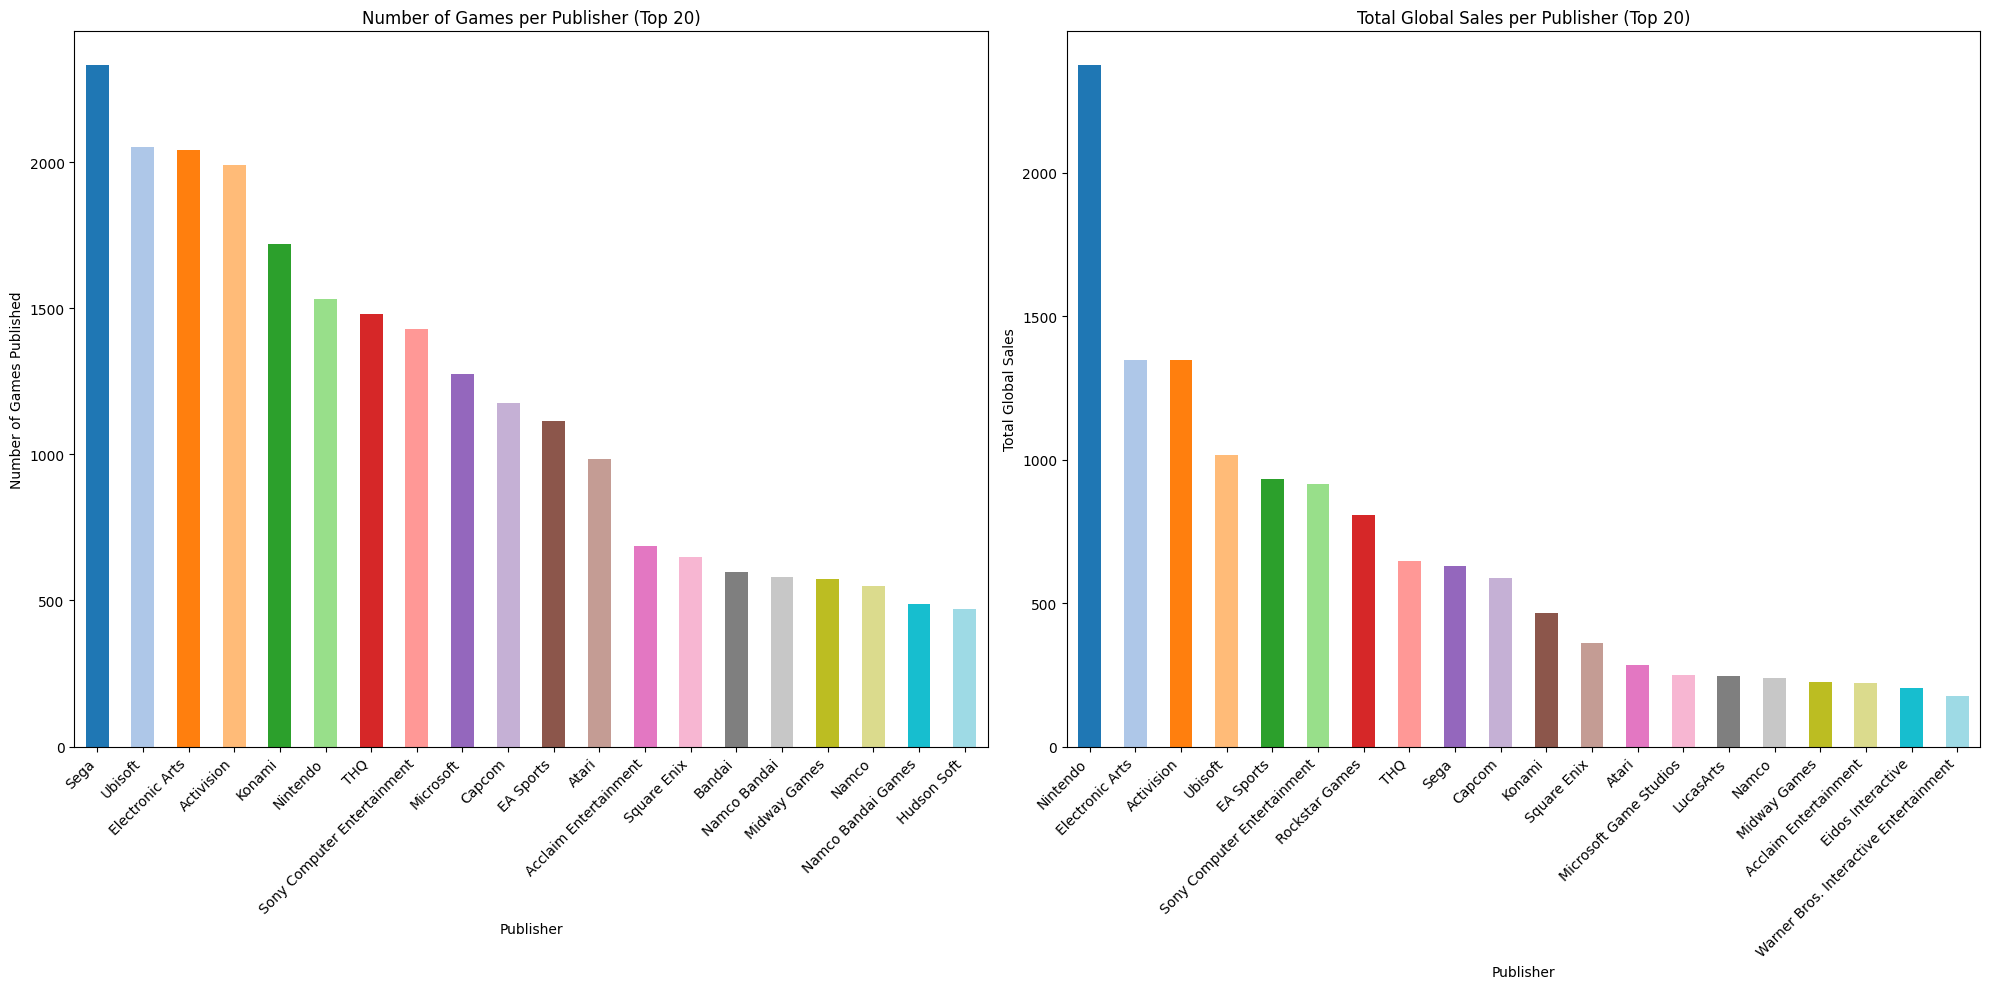

In [43]:
# @title
# Count the number of games for each publisher
publisher_counts = game_stats['publisher'].value_counts().nlargest(20)
# Group by publisher and sum the global sales
publisher_sales = game_stats.groupby('publisher')['Global_Sales'].sum().nlargest(20)

# Create the bar chart
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

#Chart 1
publisher_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_counts))))
plt.title('Number of Games per Publisher (Top 20)')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Published')
plt.xticks(rotation=45, ha='right')

#Chart 2
plt.subplot(1, 2, 2)
publisher_sales.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(publisher_sales))))
plt.title('Total Global Sales per Publisher (Top 20)')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Our first set of graphs already sets us up for some nice insights.

Overall, Sega has been the dominent games publisher based on number of games the studio has put out. Segas early focus was on arcade games and only really focused on video games from the 1980's onwards which could be a reason for the high volume.

Ubisoft, EA and Activision are all well-known and were definitely no slouches either. They still continue to put out consistently high-quality releases.
Konami and Nintnedo are both Japanese publishers although while Konami makes games for multiple consoles while Nintendo focuses mainly on their own consoles (Wii, Switch etc).

Contrasting the sales graph to the number of games sheds more light on the industry. Sega went from 1st position to 9th position when measured by sales and first place was taken by Nintendo. As we saw, they have been a dominant publisher and have become a household name with titles like the Mario Franchise, Legend of Zelda and Super Smash bros.

What sets Nintendo apart is that they solely publish games for Nintendo consoles whereas other publishers release games for multiple consoles. What this means is order to play a nintendo game, like Mario, you need to own a Nintendo console.

Distribution of Sales Across Publishers for Top Genres:

Create a series of bar charts for each top genre showing how sales are distributed among different publishers. This can reveal which publishers are dominant in specific genres.

<ipython-input-44-fc186d8984c8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='publisher', x='Global_Sales', data=best_selling_games, palette=colors, orient='h')
<ipython-input-44-fc186d8984c8>:31: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y='publisher', x='Global_Sales', data=best_selling_games, palette=colors, orient='h')


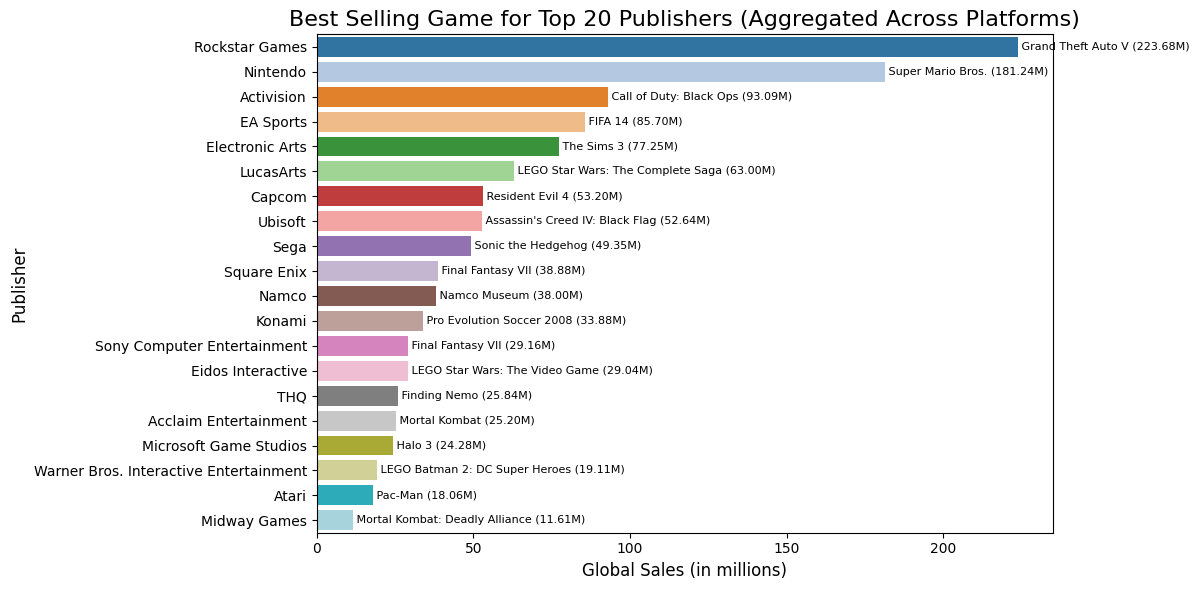

In [44]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no games with 0 sales
game_stats_clean = game_stats[game_stats['Global_Sales'] > 0]

# Group by publisher and sum Global_Sales to find the top 20 publishers by total global sales
top_publishers = game_stats_clean.groupby('publisher')['Global_Sales'].sum().nlargest(20).index

# Filter the dataset to include only games from the top 20 publishers
game_stats_top_publishers = game_stats_clean[game_stats_clean['publisher'].isin(top_publishers)]

# Aggregate sales across all platforms for each game, ex find all sales for Wii Sports across all platforms
games_aggregated = game_stats_top_publishers.groupby(['publisher', 'title'])['Global_Sales'].sum().reset_index()

# Find the single best-selling game for each of the top 20 publishers
best_selling_games = games_aggregated.loc[games_aggregated.groupby('publisher')['Global_Sales'].idxmax()]

# Sort the best-selling games by Global_Sales for visualization
best_selling_games = best_selling_games.sort_values('Global_Sales', ascending=False)

# Create the bar chart for the best-selling game for the top 20 publishers
plt.figure(figsize=(12, 6))

# Assign a colormap and convert it to a list for Seaborn
colors = plt.cm.tab20(np.arange(20))

# Horizontal bar chart with the correct order of publishers
sns.barplot(y='publisher', x='Global_Sales', data=best_selling_games, palette=colors, orient='h')

# Add game titles next to the bars
for i, (publisher, global_sales, title) in enumerate(zip(best_selling_games['publisher'], best_selling_games['Global_Sales'], best_selling_games['title'])):
    plt.text(global_sales, i, f" {title} ({global_sales:.2f}M)", ha='left', va='center', fontsize=8)

# Add title and labels
plt.title('Best Selling Game for Top 20 Publishers (Aggregated Across Platforms)', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

One more look at sales and we have another insight not apparent before. Now we see that even though Nintendo has been the best selling publisher overall,when looking at sales of individual games Rockstar games actually takes top place with Grand Theft Auto V. Not surprisingly, Nintendo comes in at second place with Super Mario Bros.

That was great to see and now we can move on to visuals on the consols.

###Consol Graphs

<ipython-input-45-a972efcf2171>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  platform_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(platform_counts))))


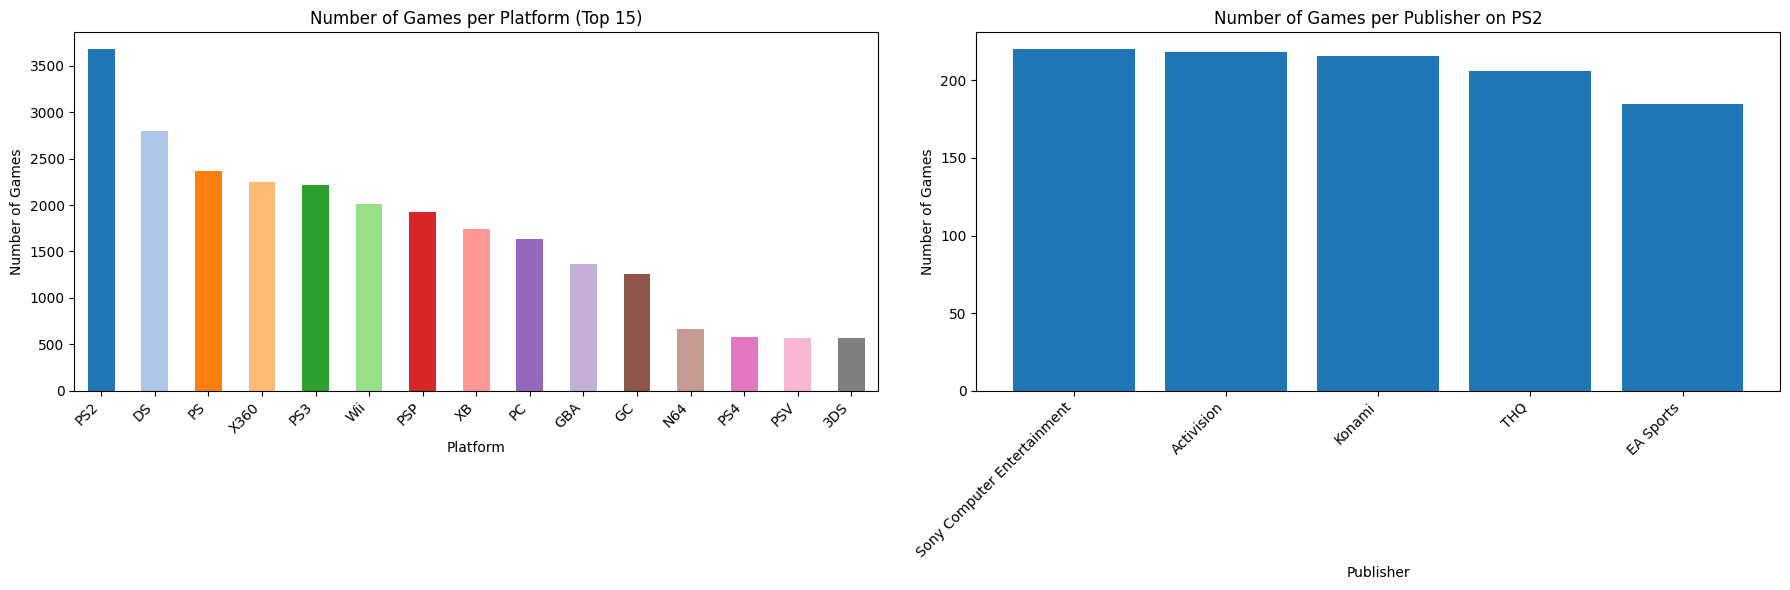

In [45]:
# @title
platform_counts = game_stats['Platform'].value_counts().nlargest(15)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
platform_counts.plot(kind='bar', color=plt.cm.get_cmap('tab20')(np.arange(len(platform_counts))))
plt.title('Number of Games per Platform (Top 15)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')


# Filter the DataFrame for PS2 games
ps2_games = game_stats[game_stats['Platform'] == 'PS2']
# Count the number of games for each publisher on PS2
publisher_counts_ps2 = ps2_games['publisher'].value_counts().nlargest(5)

plt.subplot(1, 2, 2)
plt.bar(publisher_counts_ps2.index, publisher_counts_ps2.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.title('Number of Games per Publisher on PS2')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Although this shows the number of games per platform, it also shows the popularity of the platforms. For example, PS2 has the most games and it is the best selling consol ever - when it was released it was revolutionary and it's popularity continued until the PS3 was released.

Overall, Sony has produced some of the best selling consoles ever. Second place seems like it belongs to Nintendo with the DS, WII and 3DS.

On the right we can see Sony was the publisher with the most PS2 games, very closely followed by Activision and Konami. It makes sense that Sony would have the most games but they don't publish on any other platforms. As for activision, we can't say for sure that the volume of PS2 games caused their financial success but it likely contributed to it. This is something we can come back to later with a statistical test.

###Games graphs

Just like that, we are already onto analysing the games themselves.

<ipython-input-46-bcc140d582a4>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top_games.plot(kind='bar', ax=ax1, color=plt.cm.get_cmap('tab20')(np.arange(len(top_games))))


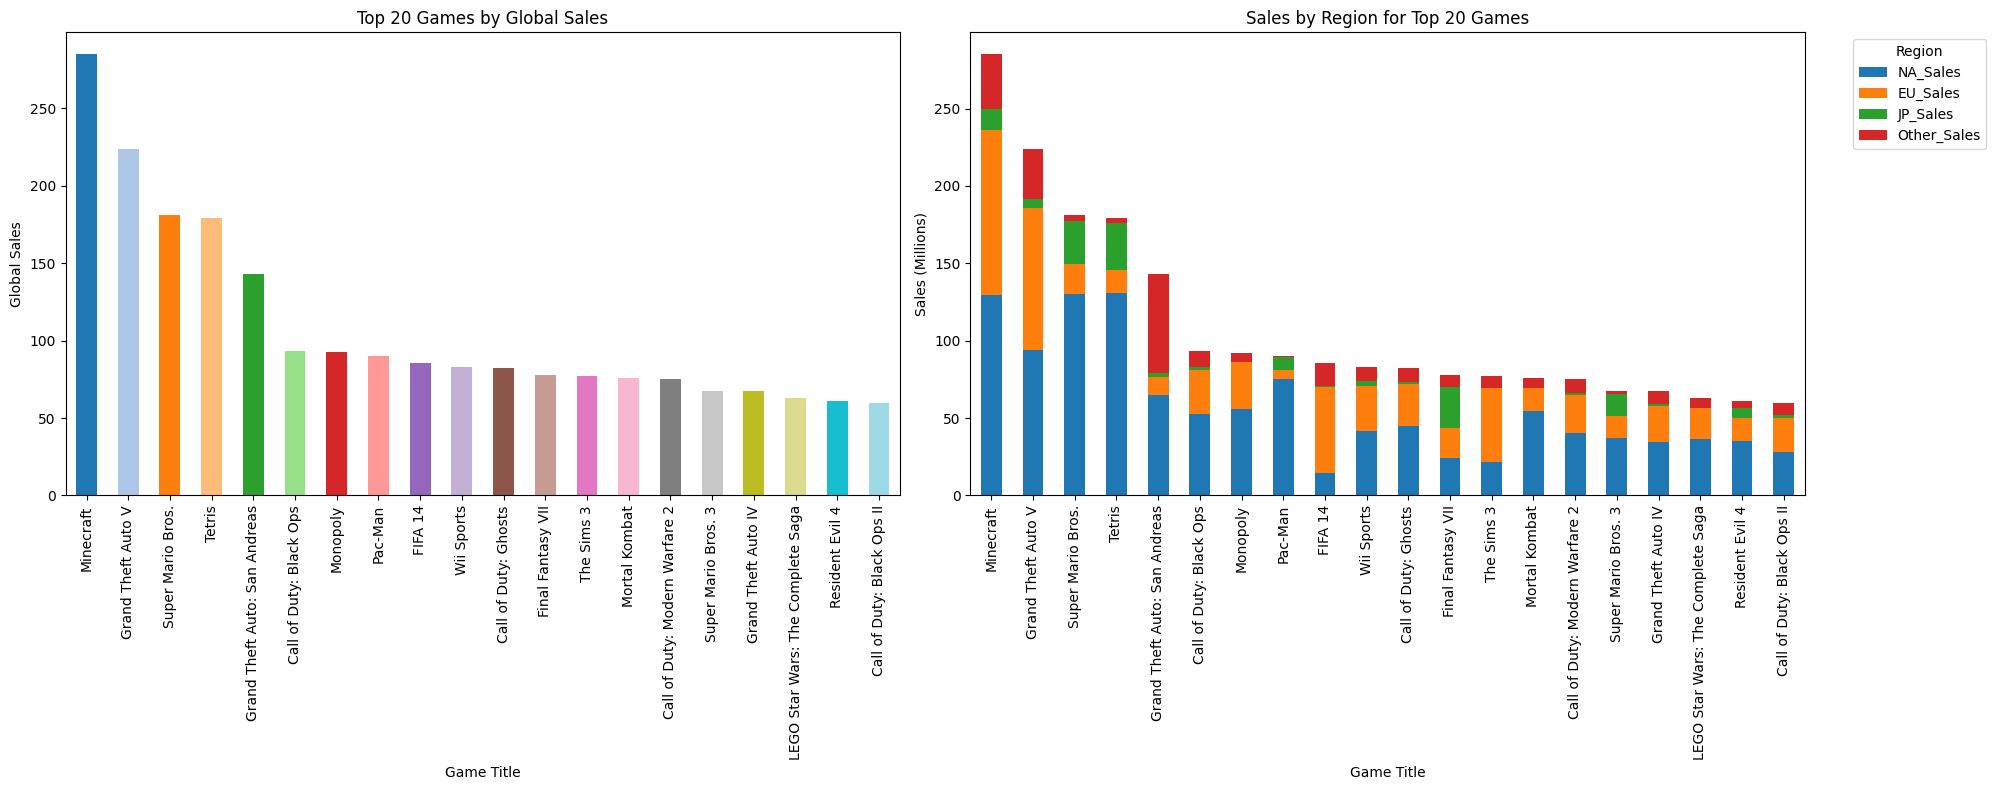

In [46]:
# @title
# Get sales for top 20 games overall
top_games = game_stats.groupby('title')['Global_Sales'].sum().nlargest(20)

#Calculate global sales in order to rank the top 20 games
top_20_games = game_stats.groupby('title').agg(
    NA_Sales=('NA_Sales', 'sum'),
    EU_Sales=('EU_Sales', 'sum'),
    JP_Sales=('JP_Sales', 'sum'),
    Other_Sales=('Other_Sales', 'sum'),
    Total_Sales=('Global_Sales', 'sum'),
).nlargest(20, 'Total_Sales')

#Drop the 'Global Sales' because it's not needed anymore
top_20_games.drop(columns=['Total_Sales'], inplace=True)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first chart (Global Sales)
top_games.plot(kind='bar', ax=ax1, color=plt.cm.get_cmap('tab20')(np.arange(len(top_games))))
ax1.set_title('Top 20 Games by Global Sales')
ax1.set_xlabel('Game Title')
ax1.set_ylabel('Global Sales')
#ax1.tick_params(axis='x', rotation=45, ha='right')

# Plot the second chart (Stacked Sales by Region)
top_20_games.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Sales by Region for Top 20 Games')
ax2.set_xlabel('Game Title')
ax2.set_ylabel('Sales (Millions)')
#ax2.tick_params(axis='x', rotation=45, ha='right')
ax2.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

For clarity sake I left both graphs in since it is easier to look at the left graph. One thing to note is that this is the best selling games regardless of publisher. That's why we have Minecraft in 1st place whereas before Minecraft didn't feature on the list since Majong is not a top 20 publisher.

With that said, Minecraft has made it's first appearance in our analysis. Minecraft has become one of the most famous games, and top-sellers, in the world and this is reflected nicely in our graph.

After Minecraft, we see GTA v and Super Mario Bros appearing again but after that, the rankings begin to diverge from what we saw before. All this means is that some of the best selling games have been made by smaller studios (smaller being outside the top 20).

Index(['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing',
       'Role-Playing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure',
       'Strategy'],
      dtype='object', name='Genre')


<ipython-input-47-a68ae407a1ea>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax1.bar(genre_counts.index, genre_counts.values, color=plt.cm.get_cmap('tab20')(np.arange(len(genre_counts))))


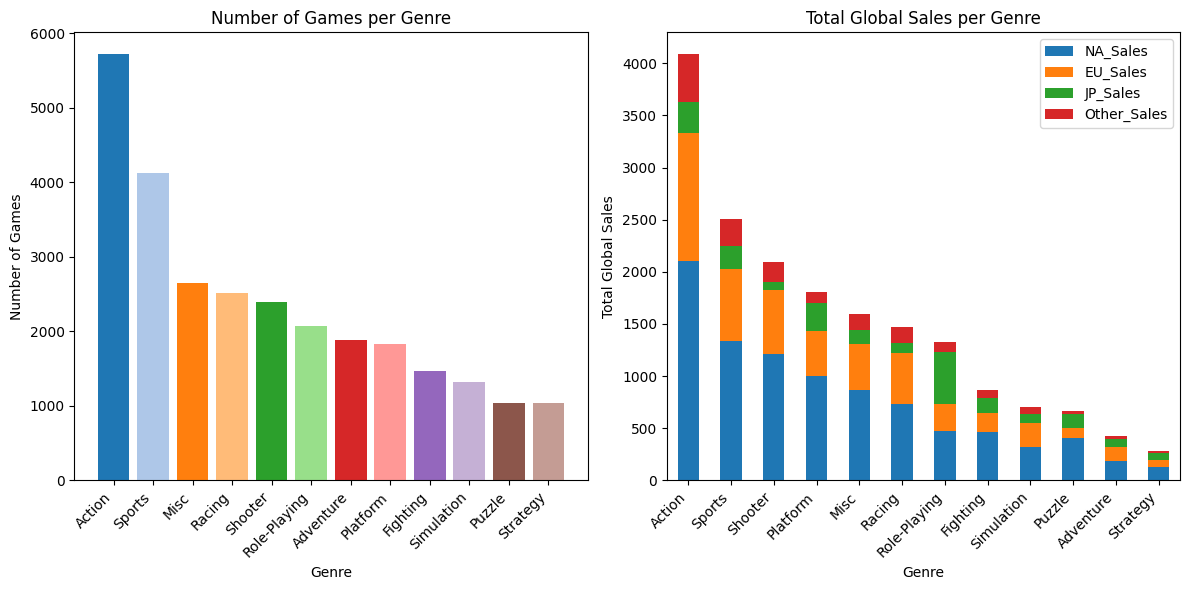

In [47]:
# @title
#Top 20 genres by game volume
genre_counts = game_stats['Genre'].value_counts()
#Genres by Global Sales
genre_sales = game_stats.groupby('Genre').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum','Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False).drop(columns=['Global_Sales'])

print(genre_sales.index)
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the first bar chart on the first axis
ax1.bar(genre_counts.index, genre_counts.values, color=plt.cm.get_cmap('tab20')(np.arange(len(genre_counts))))
ax1.set_title('Number of Games per Genre')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Games')
ax1.set_xticks(genre_counts.index)
ax1.set_xticklabels(genre_counts.index, rotation=45, ha='right')  # Ensure labels are rotated

# Create the second bar chart on the second axis
genre_sales.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Total Global Sales per Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Total Global Sales')
ax2.set_xticklabels(genre_sales.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



Alright so looking at Volume vs Sales again and we can see that Action is the most popular genre by a wide margin. Sports follows in second but 3rd by volume is Misc while 3rd by sales is shooter. We don't know which kind of games make up Misc since there are over 2500.

In every genre the sales are predominantly in North America, followed by Europe and it seems like 'Other' is 3rd largest and Japan the smallest market. This is giving us some potential foresight into the overall sales trends that we'll look at later.

<ipython-input-48-95a57bc78b7f>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  games_per_genre_year.plot(kind='bar', stacked=True, figsize=(15, 8), color=plt.cm.get_cmap('tab20')(np.arange(len(games_per_genre_year.columns))))


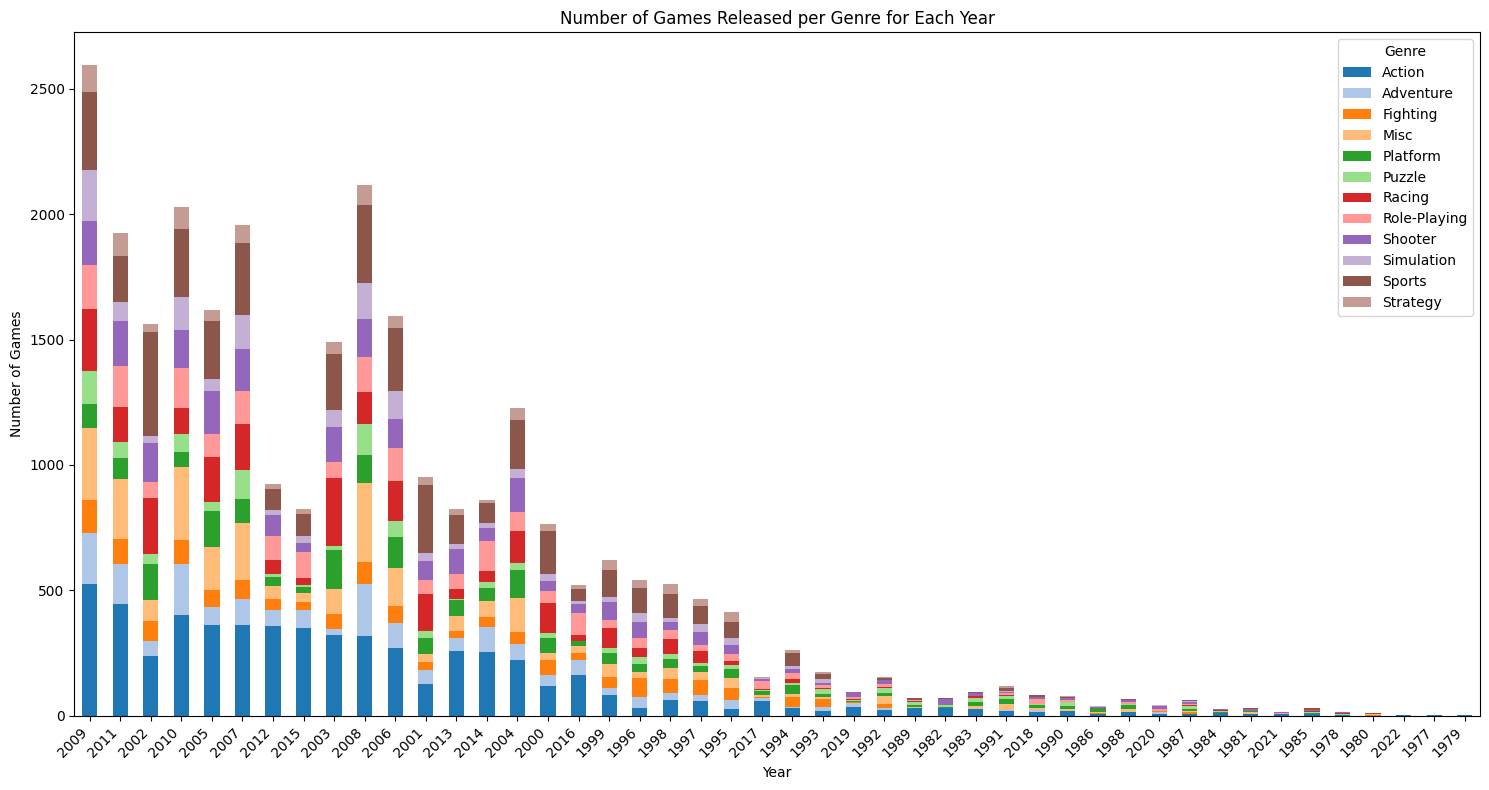

In [48]:
# @title
# Group by year and genre, then count the number of games
games_per_genre_year = game_stats.groupby([game_stats['release_date'].dt.year, 'Genre'])['title'].count()#.unstack()
games_per_genre_year=games_per_genre_year.sort_values(ascending=False).unstack()
# Create the stacked bar chart
games_per_genre_year.plot(kind='bar', stacked=True, figsize=(15, 8), color=plt.cm.get_cmap('tab20')(np.arange(len(games_per_genre_year.columns))))
plt.title('Number of Games Released per Genre for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre')



plt.tight_layout()
plt.show()

Finally, we can look at sales trends.

<ipython-input-49-5f53c1fa3e76>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_selling_games_per_year))


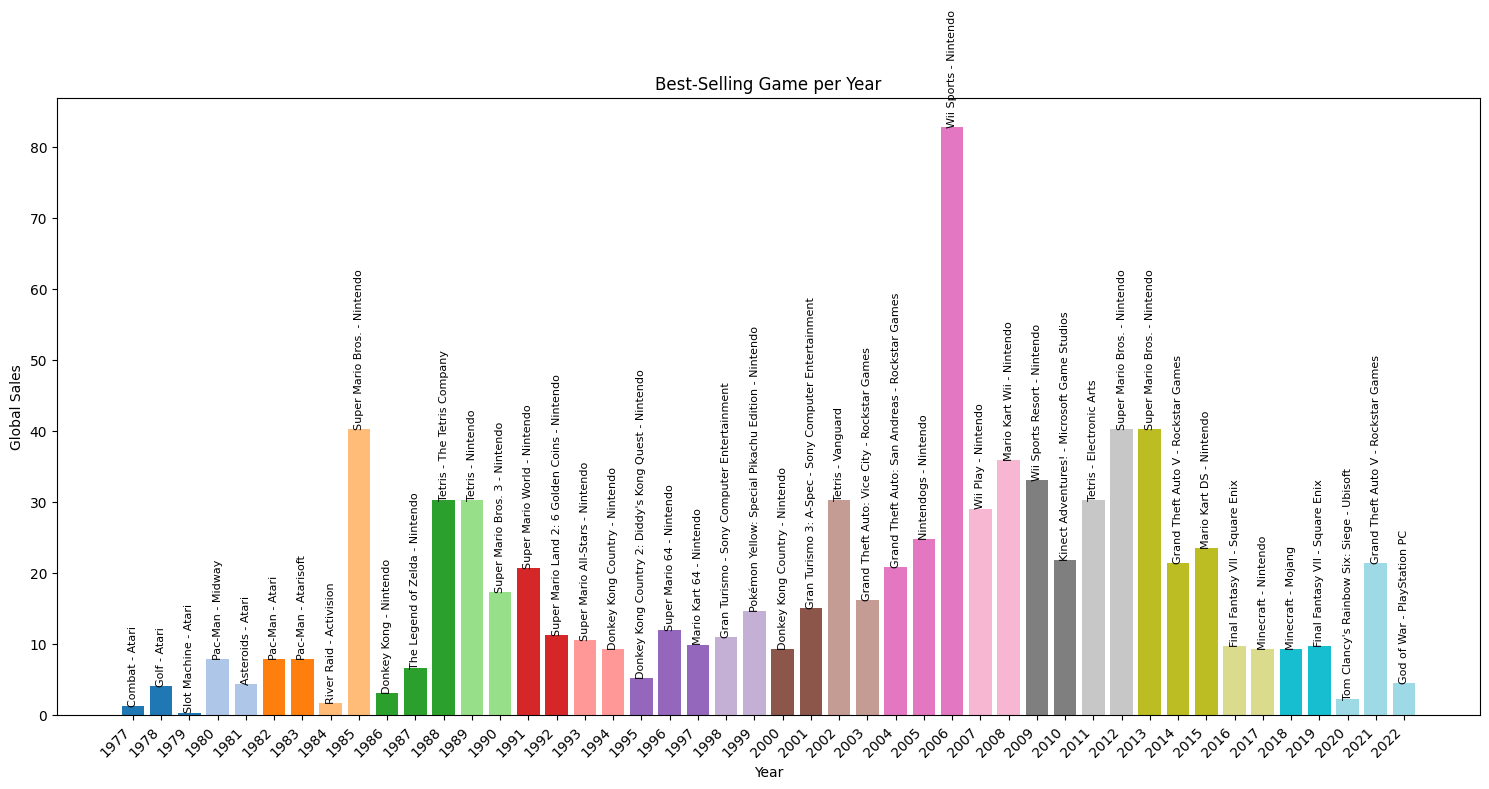

In [49]:
# @title
# Find the best-selling game for each year
best_selling_games_per_year = game_stats_clean.loc[game_stats_clean.groupby(game_stats_clean['release_date'].dt.year)['Global_Sales'].idxmax()]

# Create the bar chart
plt.figure(figsize=(15, 8))
colors = plt.cm.get_cmap('tab20', len(best_selling_games_per_year))
plt.bar(best_selling_games_per_year['release_date'].dt.year, best_selling_games_per_year['Global_Sales'], color=colors(np.arange(len(best_selling_games_per_year))))
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Best-Selling Game per Year')

# Add game titles above the bars
for i, row in best_selling_games_per_year.iterrows():
  plt.text(row['release_date'].year, row['Global_Sales'] + 0.3, row['title']+' - '+row['publisher'], rotation=90,ha='center', fontsize=8)

#Show every year
plt.xticks(np.arange(best_selling_games_per_year['release_date'].dt.year.min(), best_selling_games_per_year['release_date'].dt.year.max() + 1, 1), rotation=45, ha='right')
plt.tight_layout()
plt.show()






In [70]:
best_selling_games_per_year.head()

,title,publisher,release_date,Rank,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6142,Combat,Atari,1977-01-01,1587,2600,Action,1,0,0,0,1
54092,Golf,Atari,1978-01-01,299,NES,Sports,1,0,2,0,4
17960,Slot Machine,Atari,1979-01-01,5800,2600,Action,0,0,0,0,0
62909,Pac-Man,Midway,1980-10-01,90,2600,Puzzle,7,0,0,0,8
1737,Asteroids,Atari,1981-01-01,259,2600,Shooter,4,0,0,0,4


Looking at a breakdown of sales per year, no game has come close to the sales of Wii Sports in 2006. In fact, no other publisher has come close to Nintendo.Nintendo appears more than any other publisher.

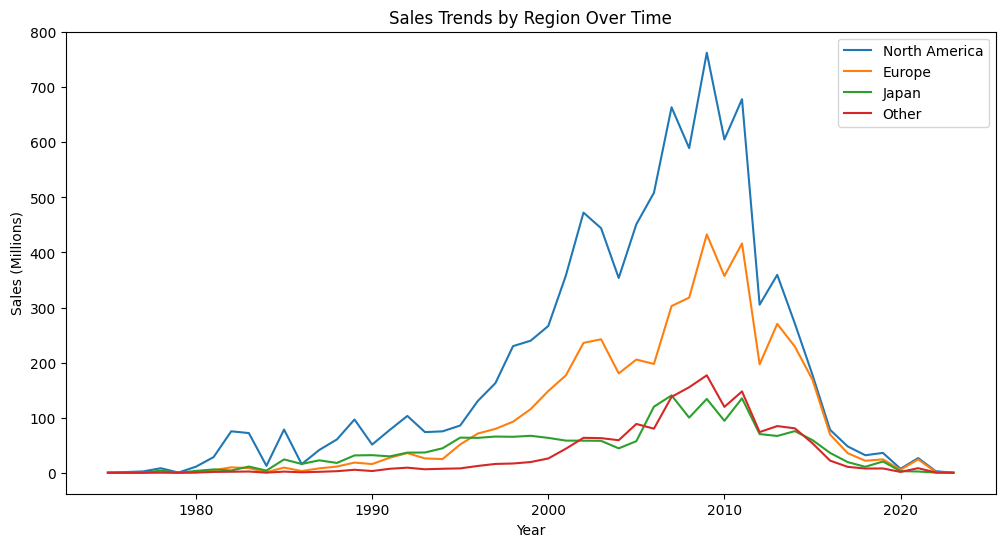

In [50]:
# @title
# Group the data by year and sum the sales for each region
sales_by_year = game_stats.groupby(game_stats['release_date'].dt.year)[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()

# Create a line plot to visualize the sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='NA_Sales', data=sales_by_year, label='North America')
sns.lineplot(x='release_date', y='EU_Sales', data=sales_by_year, label='Europe')
sns.lineplot(x='release_date', y='JP_Sales', data=sales_by_year, label='Japan')
sns.lineplot(x='release_date',y='Other_Sales',data=sales_by_year,label='Other')
plt.title('Sales Trends by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.show()


Onto Sales and we can see that sales follows the same pattern of game-releases in the chart above. This makes sense as sales follows the pattern of releases but it is still surprising that they seem so closely correlated.

US sales dominates, followed by EU but Japan and Other are very closely aligned. I would have expected Japan sales to be higher since Japanese companies like Sega, Nintendo and Konami are all top publishers.

Let's break it down by publisher to see what their pattern looks like.

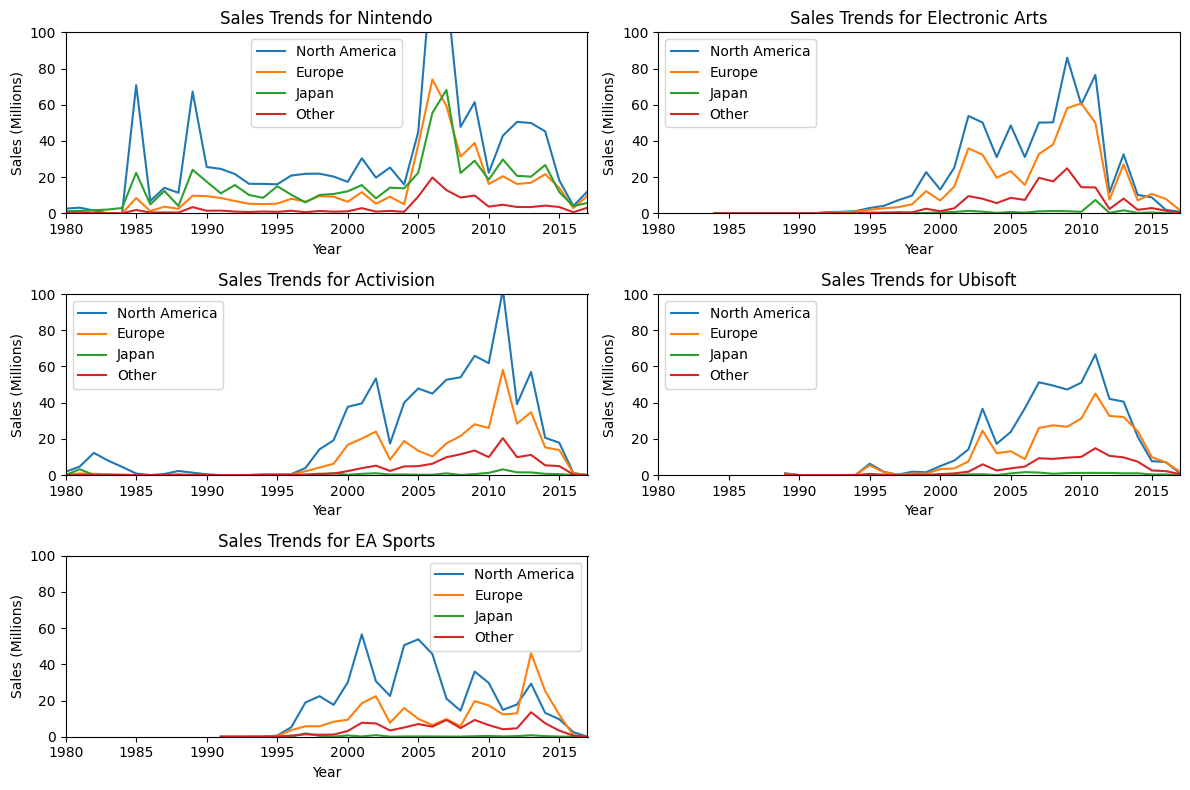

In [51]:
# @title
# Group the data by year and genre, then sum the sales for each region
sales_by_year_publisher = game_stats.groupby([game_stats['release_date'].dt.year, 'publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()

# # Get the top 10 platforms by total sales
top_5_publishers = game_stats.groupby('publisher')['Global_Sales'].sum().nlargest(5).index

# # Filter the data to include only the top 10 platforms
sales_by_year_platform_top10 = sales_by_year_publisher[sales_by_year_publisher['publisher'].isin(top_5_publishers)]

# # Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes=axes.flatten()

# # Plot sales trends for each genre
for i, publisher in enumerate(top_5_publishers):
    genre_data = sales_by_year_publisher[sales_by_year_publisher['publisher'] == publisher]
    sns.lineplot(x='release_date', y='NA_Sales', data=genre_data, ax=axes[i], label='North America')
    sns.lineplot(x='release_date', y='EU_Sales', data=genre_data, ax=axes[i], label='Europe')
    sns.lineplot(x='release_date', y='JP_Sales', data=genre_data, ax=axes[i], label='Japan')
    sns.lineplot(x='release_date', y='Other_Sales', data=genre_data, ax=axes[i], label='Other')
    axes[i].set_title(f'Sales Trends for {publisher}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].legend()
    axes[i].set_ylim(0, 100)
    axes[i].set_xlim(1980, 2017)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


As we saw above, NA had the most sales overall so it is not surprising to see that NA is the top market for each publisher. What I expected to see with Nintendo above is now more apparent. We can see that Japan matches, and outperforms in parts, the EU and Other. Out of the top 5, Nintendo has definitely captured the biggest share of the Japanese market.

The only other variation in countries is the EU for EA sports which performs relatively badly when compared to NA. Around 2012, the EU rises dramatically,and overtakes NA, before beginning to decline around 2013.

When looking at actual Sales revenue, here we can that Nintendo has been making sales since the mid-80's, putting them in a league of their own. Activision has some sales for pre-1995 but it looks insignificant comparitively.

Ubisoft, EA and Activision follow a similar trend. Sales started to pick up around 2000 follwed by a small dip, then another large increase around 2010 before tapering off towards 2015.

Nintendohad. a spike around 1985, again around 1990 and then a period of flat sales until a big spike in 2005. As we saw above, this was when Wii Sports was released. Nintendo did't see the same spike as the other publishers around 2010, perhaps a new consol was released that Nintendo did not cater for.


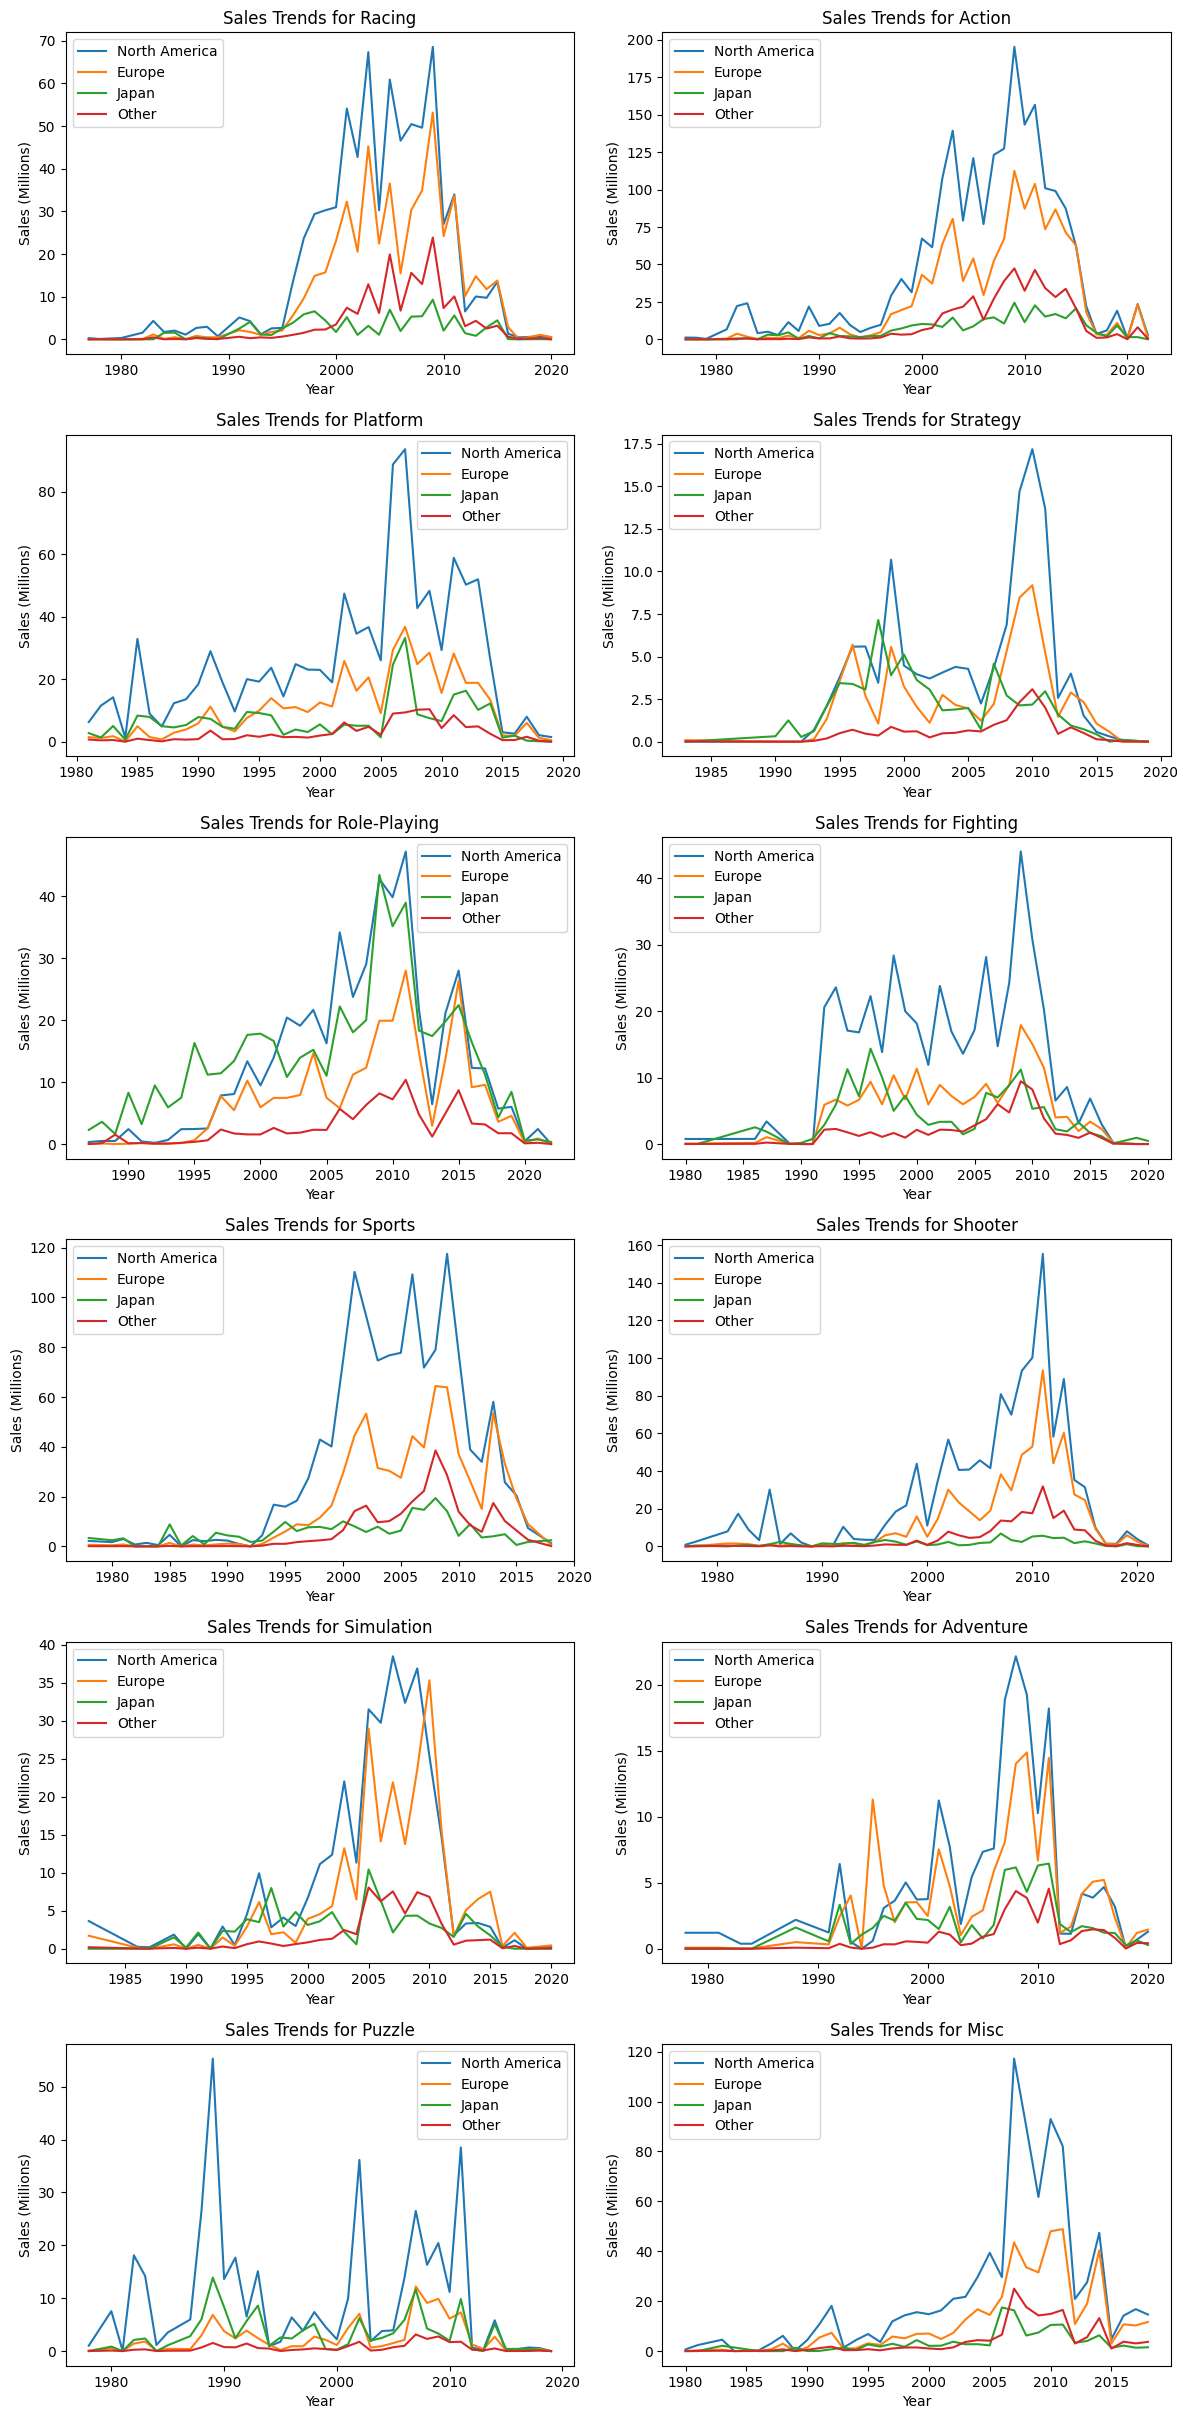

In [56]:
# @title
# Filter out 'nan' genre
game_stats = game_stats[game_stats['Genre'].notna()]

# Group the data by year and genre, then sum the sales for each region
sales_by_year_genre = game_stats.groupby([game_stats['release_date'].dt.year, 'Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum().reset_index()

# Get unique genres
genres = game_stats['Genre'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(genres), ncols=2, figsize=(12, 4 * len(genres)))


# Plot sales trends for each genre
axes=axes.flatten()
for i, genre in enumerate(genres):
    genre_data = sales_by_year_genre[sales_by_year_genre['Genre'] == genre]
    sns.lineplot(x='release_date', y='NA_Sales', data=genre_data, ax=axes[i], label='North America')
    sns.lineplot(x='release_date', y='EU_Sales', data=genre_data, ax=axes[i], label='Europe')
    sns.lineplot(x='release_date', y='JP_Sales', data=genre_data, ax=axes[i], label='Japan')
    sns.lineplot(x='release_date',y='Other_Sales', data=genre_data, ax=axes[i], label='Other')
    axes[i].set_title(f'Sales Trends for {genre}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sales (Millions)')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##Game Streams


In [53]:
stream_data.head()

,Game,Watch time (hrs),Stream time (hrs),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Year
0,Just Chatting,3.100964e+09,36271082.0,1183419,8310,2319716,354031,4141,85.49,2023-01-01
1,Grand Theft Auto V,1.334644e+09,24501434.0,528554,5377,1480243,152373,2797,54.47,2023-01-01
2,League of Legends,1.322722e+09,25621285.0,2597522,6356,938141,151012,2925,51.63,2023-01-01
3,VALORANT,9.882017e+08,39976969.0,1196352,9350,1587006,112821,4564,24.72,2023-01-01
4,Counter-Strike,6.862540e+08,11619337.0,1117445,4016,864073,78348,1326,59.06,2023-01-01


In [54]:
stream_data.describe()

,Watch time (hrs),Stream time (hrs),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Year
count,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400
mean,2.248697e+08,6.790350e+06,4.224818e+05,4947.270000,3.785857e+05,25657.960000,774.302500,54.986975,2019-07-02 18:00:00
min,1.134902e+07,1.624500e+04,1.751600e+04,21.000000,2.520000e+02,1292.000000,1.000000,2.320000,2016-01-01 00:00:00
25%,4.579547e+07,1.069828e+06,8.990875e+04,547.750000,5.519525e+04,5224.750000,121.000000,20.037500,2017-10-01 18:00:00
50%,8.212221e+07,2.377626e+06,2.057430e+05,1562.000000,1.630830e+05,9367.500000,271.000000,34.415000,2019-07-02 12:00:00
75%,2.077097e+08,7.546276e+06,4.543930e+05,4987.250000,3.909862e+05,23713.250000,860.750000,66.720000,2021-04-02 06:00:00
max,3.139111e+09,8.275286e+07,3.462517e+06,129860.000000,4.945424e+06,358386.000000,9421.000000,835.910000,2023-01-01 00:00:00
std,3.926724e+08,1.147036e+07,5.858657e+05,11139.641498,6.128813e+05,44811.857981,1308.701226,68.390646,NaN


<ipython-input-78-38c454ec043b>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top_20_watchtime.plot(kind='bar', x='Game', y='Watch time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_watchtime))))
<ipython-input-78-38c454ec043b>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top_20_streamtime.plot(kind='bar', x='Game', y='Stream time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_streamtime))))


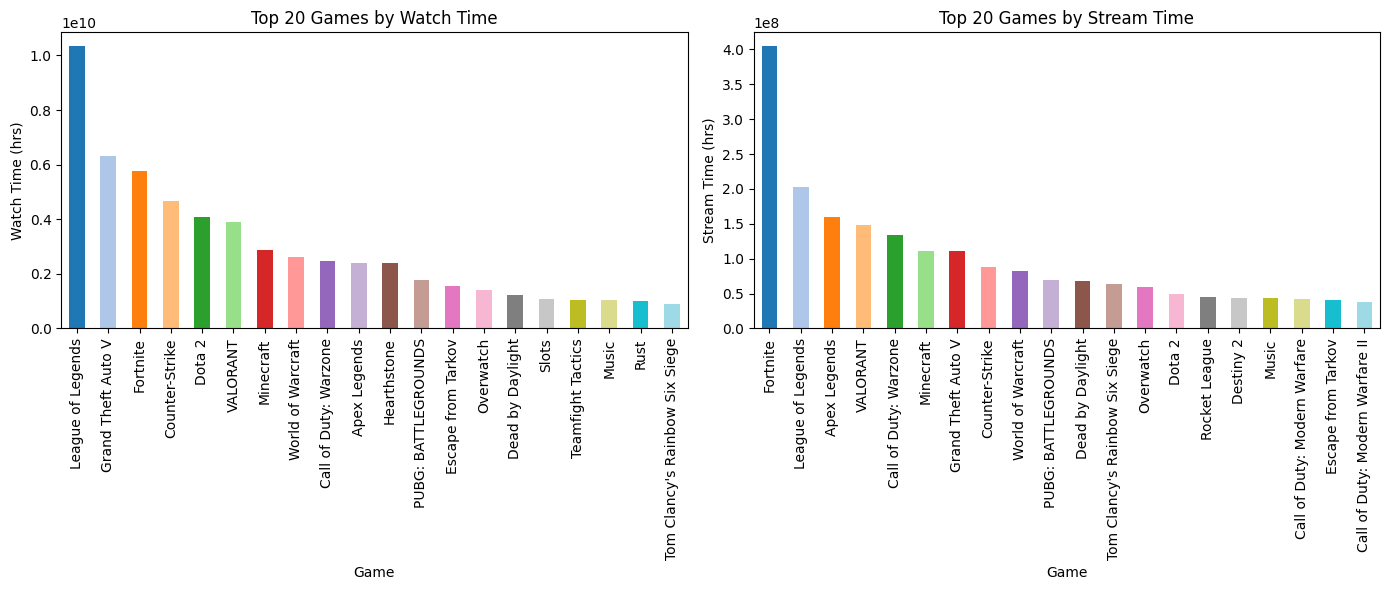

In [78]:
pd.options.display.float_format = '{:.0f}'.format

#removing just chatting since it is not a game
stream_data = stream_data[stream_data['Game'] != 'Just Chatting']

#Grouping data by game and summing total watch hours
top_20_watchtime = stream_data_filtered.groupby('Game')['Watch time (hrs)'].sum().nlargest(20)
#Grouping data by game and summing total stream hours
top_20_streamtime = stream_data_filtered.groupby('Game')['Stream time (hrs)'].sum().nlargest(20)

# Create the bar chart
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
top_20_watchtime.plot(kind='bar', x='Game', y='Watch time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_watchtime))))
plt.title('Top 20 Games by Watch Time')
plt.xlabel('Game')
plt.ylabel('Watch Time (hrs)')



# Create the bar chart
plt.subplot(1, 2, 2)
top_20_streamtime.plot(kind='bar', x='Game', y='Stream time (hrs)', color=plt.cm.get_cmap('tab20')(np.arange(len(top_20_streamtime))))
plt.title('Top 20 Games by Stream Time')
plt.xlabel('Game')
plt.ylabel('Stream Time (hrs)')

plt.tight_layout()
plt.show()

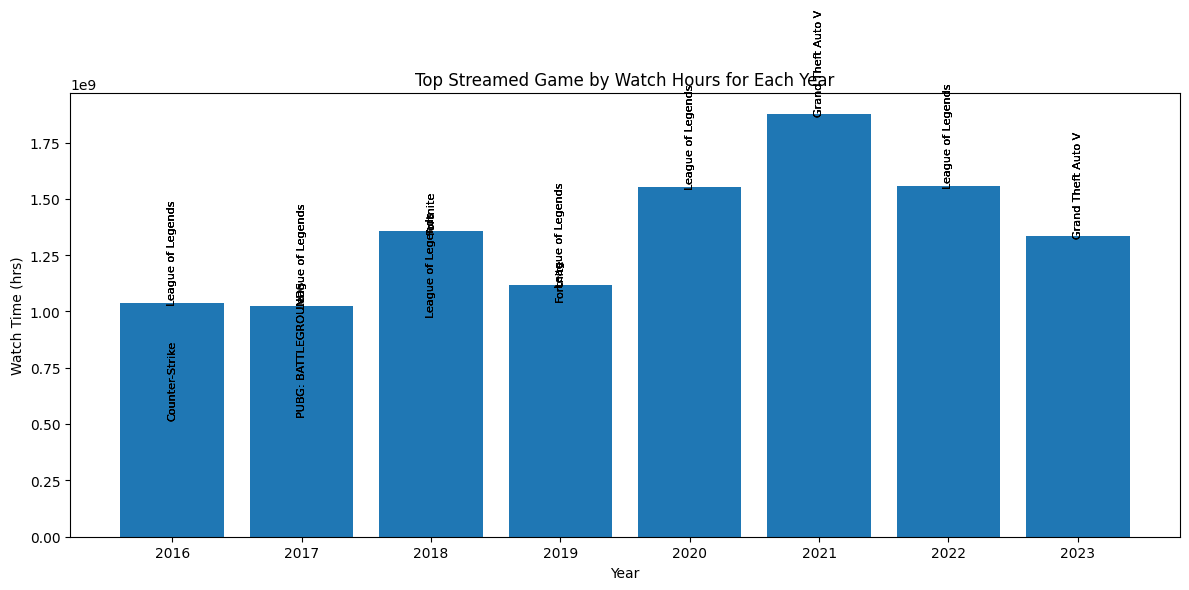

In [80]:
# Group by year and find the game with the maximum watch time for each year
top_streamed_game_per_year = stream_data.loc[stream_data.groupby(stream_data['Year'])['Watch time (hrs)'].idxmax()]

# Sort by year in ascending order
top_streamed_game_per_year.sort_values('Year', ascending=True, inplace=True)

# Extract the year as an integer
top_streamed_game_per_year['Year'] = top_streamed_game_per_year['Year'].dt.year


# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_streamed_game_per_year['Year'], top_streamed_game_per_year['Watch time (hrs)'])
plt.title('Top Streamed Game by Watch Hours for Each Year')
plt.xlabel('Year')
plt.ylabel('Watch Time (hrs)')

# Add game titles above the bars
for i, row in top_streamed_game_per_year.iterrows():
  plt.text(row['Year'], row['Watch time (hrs)'] + 0.5, row['Game'], rotation=90, ha='center', fontsize=8)

plt.tight_layout()
plt.show()


Interesting! Our graph shows that very few of the top selling games we saw previously have a relation to streaming. In fact, League of Legends was released in 2009 and still takes the top streaming spot over and over again.

This is something else we can test with a stats model.

In [86]:
merged_df = pd.merge(game_stats, game_rank, left_on=['title'], right_on=['Name'], how='left')
merged_df = pd.merge(merged_df, stream_data, left_on=['title'], right_on=['Game'], how='left')
merged_df.head()

,title,publisher,release_date_x,Rank,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Game,Watch time (hrs),Stream time (hrs),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Year
0,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,253,PS2,Racing,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,253,PS2,Racing,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,253,PS2,Racing,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,253,PS2,Racing,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,Need for Speed: Most Wanted,Electronic Arts,2005-11-15,253,PS2,Racing,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69584 entries, 0 to 69583
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  69584 non-null  object        
 1   publisher              69584 non-null  object        
 2   release_date_x         69584 non-null  datetime64[ns]
 3   Rank                   69584 non-null  float64       
 4   Platform               69584 non-null  object        
 5   Genre                  69584 non-null  object        
 6   NA_Sales               69584 non-null  float64       
 7   EU_Sales               69584 non-null  float64       
 8   JP_Sales               69584 non-null  float64       
 9   Other_Sales            69584 non-null  float64       
 10  Global_Sales           69584 non-null  float64       
 11  ID                     53722 non-null  float64       
 12  Name                   53722 non-null  object        
 13  U

In [88]:
merged_df.isna().sum()

,0
title,0
publisher,0
release_date_x,0
Rank,0
Platform,0
Genre,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [91]:
merged_df.dropna(inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 189 to 68850
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  2632 non-null   object        
 1   publisher              2632 non-null   object        
 2   release_date_x         2632 non-null   datetime64[ns]
 3   Rank                   2632 non-null   float64       
 4   Platform               2632 non-null   object        
 5   Genre                  2632 non-null   object        
 6   NA_Sales               2632 non-null   float64       
 7   EU_Sales               2632 non-null   float64       
 8   JP_Sales               2632 non-null   float64       
 9   Other_Sales            2632 non-null   float64       
 10  Global_Sales           2632 non-null   float64       
 11  ID                     2632 non-null   float64       
 12  Name                   2632 non-null   object        
 13  User 